<a href="https://colab.research.google.com/github/mbamiluka/seatbelt_detect/blob/main/Mbami_Luka_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Belt Detected


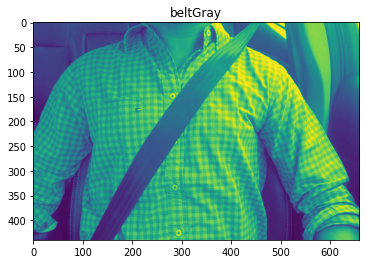

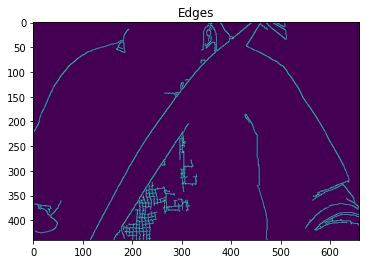

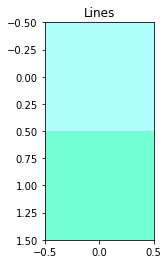

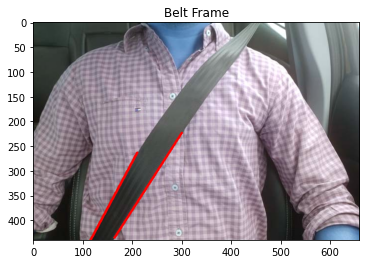

In [ ]:
import numpy as np
from cv2 import *
import matplotlib.pyplot as plt
import imutils

#Slope of line
def Slope(a,b,c,d):
    return (d - b)/(c - a)


# Reading Image
beltframe = cv2.imread("sample_data/Test.jpg")
#h,w,c = beltframe.shape
# Resizing The Image
#beltframe = cv2.resize(beltframe, (h,w),interpolation = cv2.INTER_AREA)

#Converting To GrayScale
beltGray = cv2.cvtColor(beltframe, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title('beltGray')
plt.imshow(beltGray)

# No Belt Detected Yet
belt = False

# Bluring The Image For Smoothness
blur = cv2.blur(beltGray, (3, 3))

# Converting Image To Edges
edges = cv2.Canny(blur, 50, 400)
plt.figure()
plt.title('Edges')
plt.imshow(edges)


# Previous Line Slope
prevSlope = 0

# Previous Line Co-ordinates
px1, py1, px2, py2 = 0, 0, 0, 0

# Extract Lines
lines = cv2.HoughLinesP(edges, 1, np.pi/270, 30, maxLineGap = 20, minLineLength = 170)
plt.figure()
plt.title('Lines')
plt.imshow(lines)

# If "lines" Is Not Empty
if lines is not None:

    # Loop line by line
    for line in lines:

        # Co-ordinates Of Current Line
        x1, y1, x2, y2 = line[0]

        # Slope Of Current Line
        s = Slope(x1,y1,x2,y2)
        
        # If Current Line's Slope Is Greater Than 0.7 And Less Than 2
        if ((abs(s) > 0.7) and (abs (s) < 2)):

            # And Previous Line's Slope Is Within 0.7 To 2
            if((abs(prevSlope) > 0.7) and (abs(prevSlope) < 2)):

                # And Both The Lines Are Not Too Far From Each Other
                if( ((abs(x1 - px1) > 5) and (abs(x2 - px2) > 5)) or ((abs(y1 - py1) > 5) and (abs(y2 - py2) > 5))):

                    # Plot The Lines On "beltframe"
                    cv2.line(beltframe, (x1, y1), (x2, y2), (255, 0, 0), 3)
                    cv2.line(beltframe, (px1, py1), (px2, py2), (255, 0, 0), 3)

                    # Belt Is Detected
                    print ("Belt Detected")
                    belt = True

        # Otherwise Current Slope Becomes Previous Slope (prevSlope) And Current Line Becomes Previous Line (px1, py1, px2, py2)            
        prevSlope = s
        px1, py1, px2, py2 = line[0]
        
                   
if belt == False:
    print("No Seatbelt detected")

plt.figure()
plt.title('Belt Frame')
plt.imshow(beltframe)